## XMAC02 - Atividade Avaliativa 03

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import proportion, weightstats

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Questão 1
Utilizando o dataset Ames.csv, realize um teste de hipótese que verifique a seguinte afirmação: "Casas com e sem lareira (Fireplace) têm o mesmo preço de venda (SalePrice)". Realize o teste com confiança de 95%.

In [2]:
dfAmes = pd.read_csv('Ames.csv')

dfComLareira = dfAmes[dfAmes['Fireplaces'] > 0]['SalePrice']
dfSemLareira = dfAmes[dfAmes['Fireplaces'] == 0]['SalePrice']


H0: uComLareira == uSemLareira \
HA: uComLareira <> uSemLareira


In [3]:
weightstats.ztest(dfComLareira, dfSemLareira)

(27.782606223907823, 7.038313842568898e-170)

Como pValue < 0.05, rejeitamos a H0. Portanto, casas com e sem lareira têm preços de venda diferentes.

### Questão 2
Utilizando o dataset "Ames.csv", realize um teste de hipótese que verifique a seguinte afirmação: "A proporção de casas de 3 quartos vendidas em 2006 e 2010 é a mesma em relação ao total de casas vendidas nesses anos". Realize seu teste com 95% de confiança.

p1 = proporção de casas de 3 quartos em 2006 / total de casas em 2006 \
p2 = proporção de casas de 3 quartos em 2010 / total de casas em 2010 

H0: p1 - p2 = 0 \
HA: p1 - p2 <> 0

In [4]:
df2006 = dfAmes[dfAmes['YrSold'] == 2006]
df3Qts2006 = df2006[df2006['BedroomAbvGr'] == 3]

qtd3Qts2006 = df3Qts2006.count()[0]
qtdTotal2006 = df2006.count()[0]

df2010 = dfAmes[dfAmes['YrSold'] == 2010]
df3Qts2010 = df2010[df2010['BedroomAbvGr'] == 3]

qtd3Qts2010 = df3Qts2010.count()[0]
qtdTotal2010 = df2010.count()[0]

proportion.test_proportions_2indep(qtd3Qts2006, qtdTotal2006, qtd3Qts2010, qtdTotal2010)


/tmp/ipykernel_30221/3284366084.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qtd3Qts2006 = df3Qts2006.count()[0]
/tmp/ipykernel_30221/3284366084.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qtdTotal2006 = df2006.count()[0]
/tmp/ipykernel_30221/3284366084.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qtd3Qts2010 = df3Qts2010.count()[0]
/tmp/ipykernel_30221/3284366084.py:11: FutureWarning: Series.__getitem__ treat

<class 'statsmodels.stats.base.HolderTuple'>
statistic = -1.0215311074026974
pvalue = 0.3070028787836402
compare = 'diff'
method = 'agresti-caffo'
diff = -0.036584989983048266
ratio = 0.9333857118805768
odds_ratio = 0.863321281348594
variance = 0.0012643548012818092
alternative = 'two-sided'
value = 0
tuple = (-1.0215311074026974, 0.3070028787836402)

Como pValue > 0.05, falhamos em rejeitar a H0. Portanto, a proporção entre o total de vendas com casas de 3 quartos e todas as casas, nos anos de 2006 e 2010, é diferente.

### Questão 3
Utilizando o dataset "IMC_paises.csv", considere a seguinte afirmação: "O IMC de homens e mulheres em nível global é equivalente". Para verificar se isso é verdade, realize um teste de hipótese com o IMC Nacional (National) e utilize dados do ano 2017. Informe o teste escolhido e o resultado obtido. Interprete o resultado e informe se a afirmação é verdadeira de acordo com o teste realizado. Em seguida, plote dois boxplots que exibam os dados de IMC de homens e mulheres e confronte com o resultado do teste de hipótese. Finalmente discuta se o resultado do teste está de acordo com a informação exibida nos boxplots. Realize o teste de hipótese com nível de confiança de 95%.

In [5]:
dfImcPaises = pd.read_csv('IMC_paises.csv')

dfImcNational2017 = dfImcPaises[(dfImcPaises['Region'] == 'National') & (dfImcPaises['Year'] == 2017)]
dfImcNational2017

,Unnamed: 0,Country,Sex,Region,Year,IMC
3,3,Afghanistan,Men,National,2017,22.8
9,9,Afghanistan,Women,National,2017,24.4
15,15,Albania,Men,National,2017,27.0
21,21,Albania,Women,National,2017,26.0
27,27,Algeria,Men,National,2017,25.1
...,...,...,...,...,...,...
2313,2313,Yemen,Women,National,2017,24.3
2319,2319,Zambia,Men,National,2017,22.2
2325,2325,Zambia,Women,National,2017,23.9
2331,2331,Zimbabwe,Men,National,2017,22.3


Comparação entre o IMC de homens e mulheres, no ano de 2017, utilizando Teste Z, pois n > 30 e podemos obter os desvios padrões.

H0: uImcHomens == uImcMulheres \
HA: uImcHomens <> uImcMulheres

In [6]:
imcHomens = dfImcNational2017[dfImcNational2017['Sex'] == 'Men']['IMC']
imcMulheres = dfImcNational2017[dfImcNational2017['Sex'] == 'Women']['IMC']


weightstats.ztest(imcHomens, imcMulheres)

(-2.9968530694244127, 0.0027278215388439266)

Como pValue obtido (0.0027) é menor que 0.05, rejeitamos a H0. Portanto, a média de IMC entre homens e mulheres é diferente, para o ano de 2017 e em região nacional.

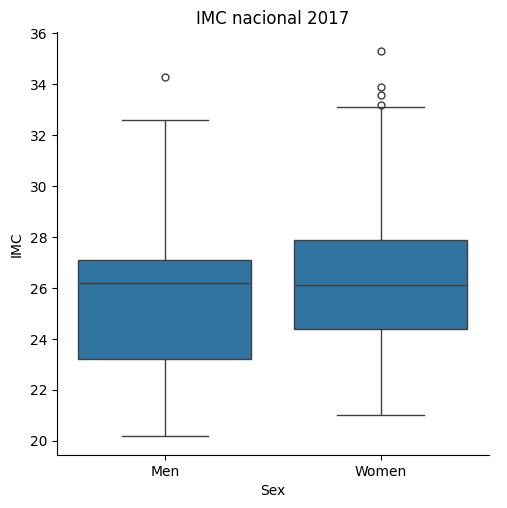

In [7]:
sns.catplot(dfImcNational2017, x='Sex', y='IMC', kind='box')
plt.title('IMC nacional 2017')
plt.show()

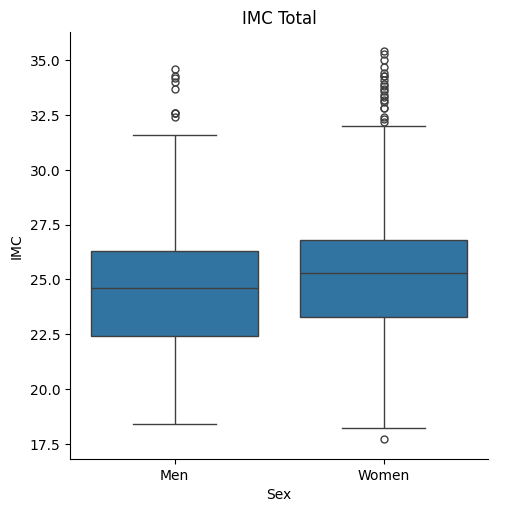

In [8]:
sns.catplot(dfImcPaises, x='Sex', y='IMC', kind='box')
plt.title('IMC Total')
plt.show()

Após analisar os gráficos, o resultado obtido através do teste de hipótese se torna questionável. Os gráficos gerados passam a impressão de que na verdade a média de IMC entre homens e mulheres é bem próxima, contrariando os resultados obtidos, tanto para o ano de 2017 em âmbito nacional, quanto para os dados gerais. 

### Questão 4
Dataset questão 4: IMC_paises.csv. \
Considere a seguinte afirmação: "Os homens estão mais magros em 2017 do que estavam em 1985". Para realizar um teste de hipótese capaz de confirmar ou refutar essa afirmação, você deverá gerar dois conjuntos de dados (dois dataframes) contendo 20 registros cada. O primeiro dataframe deverá conter o IMC de homens da região nacional (National)e do ano de 1985, e o segundo dataframe deverá conter esses mesmos dados do ano de 2017. Note que os dados da posição n de cada conjunto devem ser do mesmo país. Para tanto, você pode selecionar os 20 primeiros registros de cada dataframe criado. Com os dados filtrados nos dataframes df1 e df2, realize o teste de hipótese e analise o resultado. Você deve informar a hipótese nula, a hipótese alternativa, o teste escolhido, o resultado obtido e, finalmente, analisar o resultado dizendo se a afirmação deve ser confirmada ou refutada.

In [22]:
df1 = dfImcPaises[(dfImcPaises['Sex'] == 'Men') & (dfImcPaises['Year'] == 1985) & ((dfImcPaises['Region'] == 'National'))].head(20)
df2 = dfImcPaises[(dfImcPaises['Sex'] == 'Men') & (dfImcPaises['Year'] == 2017) & ((dfImcPaises['Region'] == 'National'))].head(20)



Testar se a média de IMC de 1985 é maior que a de 2017 (ou seja, em 2017 os homens estão mais magros). \
Como n < 30 e os dados são relacionados, será utilizado o teste T de duas amostras relacionadas.

H0: uImc1985 <= uImc2017 \
HA: uImc1985 > uImc2017 

In [23]:
p_antes = df1['IMC']
p_depois = df2['IMC']

stats.ttest_rel(p_antes, p_depois)

TtestResult(statistic=-17.18762468917212, pvalue=4.908528946909654e-13, df=19)

Como o pValue obtido é extremamente pequeno, podemos rejeitar a H0, mesmo considerando uma taxa de 95% de acerto. Portanto, os homens realmente estão mais magros em 2017.

### Questão 5
João e Pedro são dois treinadores de fitness que querem comparar seus taxa de satisfação do cliente. João escolheu uma amostra aleatória de 85 clientes e Pedro escolheu uma amostra aleatória de 72 clientes. João descobriu que 89% de seus
clientes ficaram satisfeitos e Pedro descobriu que 91% de seus clientes estavam satisfeitos. Usando um nível de confiança de 95%, informe se existe diferença na satisfação dos clientes de João e Pedro.

H0: pJoão - pPedro = 0 \
Ha: pJoão - pPedro ≠ 0

In [24]:
totalJoao = 85
totalPedro = 72

qtdJoao = 0.89 * totalJoao
qtdPedro = 0.91 * totalPedro

proportion.test_proportions_2indep(qtdJoao, totalJoao, qtdPedro, totalPedro, method='score')


<class 'statsmodels.stats.base.HolderTuple'>
statistic = -0.41338654892272453
pvalue = 0.6793234280733379
compare = 'diff'
method = 'score'
variance = 0.002340708375230431
alternative = 'two-sided'
prop1_null = 0.8991719745222931
prop2_null = 0.8991719745222931
tuple = (-0.41338654892272453, 0.6793234280733379)
diff = -0.019999999999999907
ratio = 0.9780219780219781
odds_ratio = 0.8001998001998011
value = 0

Como pValue > 0.05, falhamos em rejeitar a H0. Portanto, existe sim uma diferença na satisfação dos clientes de João e Pedro.

### Questão 6
São considerados obesos indivíduos com bmi >= 30. Utilizando o dataset 'insurance' realize um teste de hipótese que verique se indivíduos obesos gastam mais com o seguro saúde quando comparados com indivíduos não obesos. Realize seu teste com um nível de confiança de 95%.

H0: uObesos <= uNaoObesos \
H0: uObesos > uNaoObesos 

In [31]:
dfInsurance = pd.read_csv('insurance.csv')
dfInsurance.head()

dfObesos = dfInsurance[dfInsurance['bmi'] >= 30]['charges']
dfNaoObesos = dfInsurance[dfInsurance['bmi'] < 30]['charges']

weightstats.ztest(dfObesos, dfNaoObesos, alternative='larger')

(7.442815495893551, 4.928085145587526e-14)

Como pValue é muito menor que 0.05, rejeitamos a H0. Portanto, obesos gastam mais que não obesos.

### Questão 7
Teste a afirmação de que, em 2006, o peso médio dos homens nos EUA não era significativamente diferente do peso médio das mulheres. Pesquisa anterior mostrou que os desvios padrão da população eram de 10,25 libras para homens e 8,58 libras para mulheres. Uma amostra aleatória de 1.500 homens tem peso médio de 193,5 libras e uma amostra aleatória de 1.500 mulheres tem um peso médio de 185,3 libras. Supondo que as variâncias populacionais sejam desiguais, realize um teste de hipótese com confiança de 95% para testar essa afirmação.

H0: uHomens == uMulheres \
HA: uHomens <> uMulheres 


Utilizando teste T de duas amostras: